0 1
10 2
50 3
100 4


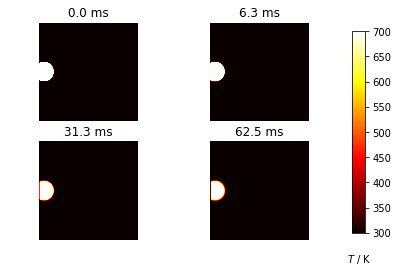

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# plate size, mm
w = h = 100.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = np.empty((nx, ny))

# Initial conditions - ring of inner radius r, width dr centred at (cx,cy) (mm)
r, cx, cy = 10, 50, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:841: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


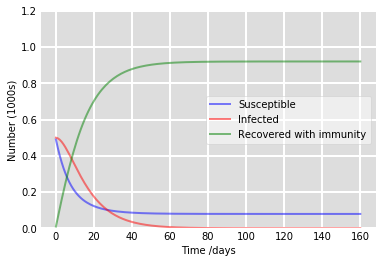

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 500, 10
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

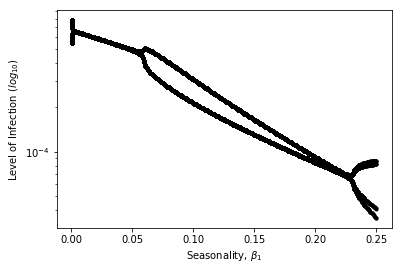

In [17]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

beta0=17/13.0;
beta1=([0.1]);
gamma=1/13.0;
mu=1/(50*365.0);
S0=1/17.0;
I0=1e-4;
ND=MaxTime=60*365.0;
TS=1.0


### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
(beta0,beta1,gamma,mu,S0,I0,ND)=(17/13.,np.arange(0.001,0.251,0.001),1/13.,1./(50*365),1/17.,1e-4,20*365)

INPUT=np.array((S0,I0, 1-S0-I0))

def diff_eqs(INP,t):  
    '''The main set of equations'''
    Y=np.zeros((3))
    V = INP   
    beta=beta0*(1+beta1*np.sin(2*np.pi*t/365))
    Y[0] = mu - beta*V[0]*V[1] - mu*V[0]
    Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
    Y[2] = gamma * V[1] - mu * V[2]
    return Y   # For odeint

if len(beta1)==1:
    beta1=beta1[0]
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = spi.odeint(diff_eqs,INPUT,t_range)

    print(RES)

    t=(np.arange(ND)/365.)
	#Ploting
    pl.subplot(311)
    pl.plot(t,RES[1:,0], 'g', label='S')
    pl.xlabel ('Time (years)')
    pl.ylabel ('Susceptibles')
    pl.subplot(312)
    pl.plot(t,RES[1:,1], 'r', label='I')
    pl.xlabel ('Time (years)')
    pl.ylabel ('Infectious')
    pl.subplot(313)
    pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
    pl.xlabel ('Time (years)')
    pl.ylabel ('Recovereds')

else:
    pl.ion()
    if ND < 3650:
        ND = 3650
    beta2=beta1
    Bifur_I=np.zeros((len(beta2),10))
    for i in range(len(beta2)):
        beta1 = beta2[i]

        t_start = 0.0; t_end = ND; t_inc = TS
        t_range = np.arange(t_start, t_end+t_inc, t_inc)
        RES = spi.odeint(diff_eqs,INPUT,t_range)
        INPUT=RES[-1]

        for j in range(10):
            Bifur_I[i,j]=RES[np.arange(ND)[((ND-j*365)-1)],1]
			
		### Producing the plot step by step but it is slow
		### Prefer to make a video as shown in spatial models
				### If condition helps to make graph faster
        if i%5==0:
            pl.semilogy (beta2, Bifur_I, '.k')
            pl.xlabel (r'Seasonality, $\beta_1$')
            pl.ylabel (r'Level of Infection $(log_{10})$')
            pl.draw()
    pl.ioff()
    pl.semilogy (beta2, (Bifur_I), '.k')
	### if TeX commands do not work comment the next lines
    pl.xlabel (r'Seasonality, $\beta_1$')
    pl.ylabel (r'Level of Infection $(log_{10})$')
	### if TeX commands do not work uncomment the next lines
    #pl.xlabel ('Seasonality, beta1')
    #pl.ylabel ('Level of Infection (log_10)')
pl.show()

In [19]:

# 3 G r a p h Vi s u al . py : 3 p l o t s i n t h e same f i g u r e , wit h b a r s , d o t s and c u r v e
2
import visual.graph as vg

s t r i n g = "blue: sin(xˆ2), red: cos(x), black: sin(x)*cos(x)"
g r a p h 1 = vg . g d i s p l a y ( x =0 , y =0 , wi dt h =600 , h e i g h t =350 , t i t l e = s t r i n g , 6
x t i t l e =’x’ , y t i t l e =’y’ , xmax = 5 . , xmin =−5. , ymax = 1 . 1 , ymin =−0.6)
# c u r v e , v e r t i c a l b a r s , d o t s 8
y1 = vg . g c u r v e ( c o l o r =vg . c o l o r . bl u e , d e l t a = 3 )
y2 = vg . g v b a r s ( c o l o r =vg . c o l o r . r e d ) 10
y3 = vg . g d o t s ( c o l o r =vg . c o l o r . w hit e , d e l t a = 3 )
12
f o r x i n vg . a r a n g e (−5, 5 , 0 . 1 ) : # a r a n g e f o r f l o a t s
y1 . p l o t ( p o s = ( x , vg . s i n ( x )∗vg . s i n ( x ) ) ) 14
y2 . p l o t ( p o s = ( x , vg . c o s ( x )∗vg . c o s ( x ) ) )
y3 . p l o t ( p o s = ( x , vg . s i n ( x )∗vg . c o s ( x ) ) ) 

SyntaxError: invalid syntax (<ipython-input-19-117516dc591b>, line 4)

In [2]:
import visual.graph as vg

ModuleNotFoundError: No module named 'visual'

In [ ]:
string = "blue: sin(xˆ2), red: cos(x), black: sin(x)*cos(x)"
graph1 = vg.gdisplay(x =0,y =0,width =600,height =350 , t i t l e = s t r i n g , 6
x t i t l e =’x’ , y t i t l e =’y’ , xmax = 5 . , xmin =−5. , ymax = 1 . 1 , ymin =−0.6)
# c u r v e , v e r t i c a l b a r s , d o t s 8
y1 = vg . g c u r v e ( c o l o r =vg . c o l o r . bl u e , d e l t a = 3 )
y2 = vg . g v b a r s ( c o l o r =vg . c o l o r . r e d ) 10
y3 = vg . g d o t s ( c o l o r =vg . c o l o r . w hit e , d e l t a = 3 )
12
f o r x i n vg . a r a n g e (−5, 5 , 0 . 1 ) : # a r a n g e f o r f l o a t s
y1 . p l o t ( p o s = ( x , vg . s i n ( x )∗vg . s i n ( x ) ) ) 14
y2 . p l o t ( p o s = ( x , vg . c o s ( x )∗vg . c o s ( x ) ) )
y3 . p l o t ( p o s = ( x , vg . s i n ( x )∗vg . c o s ( x ) ) ) 